# Logistic regression code

**Notation:**

$\alpha = \text{Learning rate}$

$\nabla_{\theta} = \text{Gradient}$

$m = \text{Length of the training set}$

$\theta = \text{Theta parameters}$

**Equations Logistic Regression:**


**Sigmoid function**

$\sigma (p) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-p}}  $ 

**Model prediction** 

$p = \sigma(\theta \cdot X)$




$y =
\begin{cases}
  0 =\text {if  p} \lt 0.5\\
  1 =\text {if  p} \geq 0.5
\end{cases}
$



**Cost Function**

$\text {Binary cross entropy loss} = -\frac{1}{m} \sum_{i=1}^m[y log(p)+(1-y)log(1-p)]$

**Gradient**

$\nabla_{\theta} \to \frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m ({p - y})x$

**Vectorized Gradient**

$\nabla_{\theta}$  $ = \frac{1}{m} \cdot X^T (p- y)$

**Update theta**

$\theta = \theta - \alpha \cdot \nabla_{\theta}$


In [300]:
import numpy as np
import matplotlib.pyplot as plt

In [301]:
class Classification():
    def __init__(self):
        self._iterations = 2000
        self._learning_rate = 0.01
        self.theta = None
        self.bias = None
        self.cost = []

    def sigmoid(self,x):
        z = 1/(1 + np.exp(-x))
        return z

    def plot_graph(self):
        plt.plot(self.cost)
        plt.show()
    
    def fit(self,X,y):
        m,n = X.shape
        y = y.reshape((m,1))
        self.theta = np.random.randn(n,1)
        self.bias = 1
        for i in range(self._iterations):
            h = np.dot(X,self.theta) + self.bias
            z = self.sigmoid(h)    
            J = (-1/m)*np.sum((y*np.log(z))+((1-y)*np.log(1-z)))
            error = z - y
            grad = (1/m)*np.dot(X.T,error)
            dbias = (1/m)*np.sum(error)
            self.theta =  self.theta - self._learning_rate*grad
            self.bias = self.bias - self._learning_rate*dbias
            self.cost.append(J)
            
        self.plot_graph()
        

    def predict(self, X_test):        
        pred = self.sigmoid(np.dot(X_test, self.theta) + self.bias)
        return (pred >= 0.5 )*1


In [302]:
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

### Creating a toy dataset for testing the class

In [303]:
x, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 2)

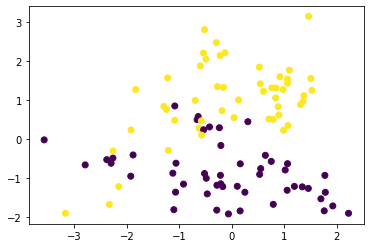

In [304]:
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

In [305]:
clf = Classification()

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

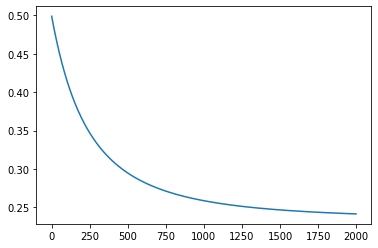

In [307]:
clf.fit(x_train, y_train)

In [308]:
preds = clf.predict(x_test)

In [309]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,preds)
acc

0.76

We will plot the decision boundary to see how the model performs

In [317]:
min_, max_ = np.min(x_test[:,0]), np.max(x_test[:,0])

In [318]:
boundary = -((clf.theta[0] /clf.theta[1]) *[[min_,max_]]) - clf.bias / clf.theta[1]

In [319]:
maxmin = np.array([min_,max_]).reshape(1,2)

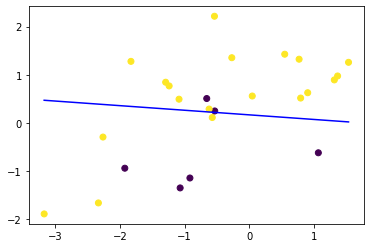

In [320]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.plot(np.array([min_, max_]),boundary[0], 'b')
plt.show()

Seems to work too!

Now these two classes will be exported to the LinearModels.py file to be used and evaluated in a more complicated datasets